NoteBook de Lussiez Julien sur les poissons-chats.

Exercice 6.1

1. Importer le dataset catfish et 2. Tracer la courbe de vente de poisson-chats

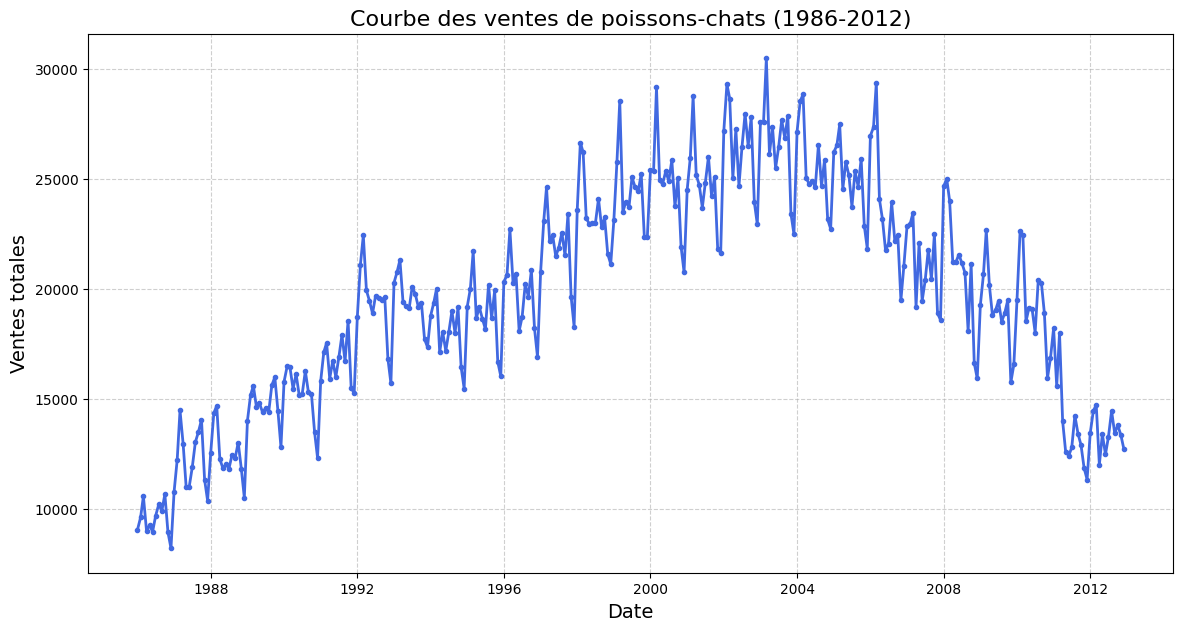

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('catfish.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Total'], color='royalblue', linewidth=2, marker='o', markersize=3)

plt.title('Courbe des ventes de poissons-chats (1986-2012)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ventes totales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Voici la courbe de vente des poissons-chats entre 1986 et 2012.
Petite montée des ventes autour de 2002-2003 et plus on avance plus on revient sur les mêmes statistiques que les années 80.

3. Tracer la courbe de vente de 1996 à 2000

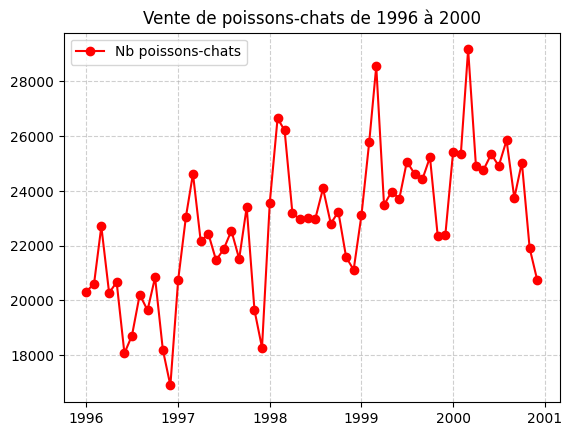

In [134]:
import numpy as np

data_filtered = data.loc['1996':'2000']
log_data_filtered = np.log(data_filtered)

g, ax = plt.subplots()
ln1 = ax.plot(data_filtered, c='r', marker='o', label='Nb poissons-chats')
plt.title('Vente de poissons-chats de 1996 à 2000')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

4. Quelle est la moyenne des ventes

Pour plus de lisibilité sur le graphique (dans les dates), j'ai préféré pousser le graphique sur l'année 2000.

In [135]:
data_1992 = data.loc['1992']

mean_sales_1992 = data_1992['Total'].mean()

mean_sales_1992

np.float64(19278.0)

Une moyenne plutôt basse par rapport aux très bonnes années.

In [136]:
data_90 = data.loc['1990' : '1999']

mean_sales_90s = data_90['Total'].mean()

mean_sales_90s

mean_sales_90s_rounded = round(mean_sales_90s)

mean_sales_90s_rounded

19702

C'est déjà un peu plus haut que l'année 92 uniquement mais c'est pas non plus terrible.

In [137]:
mean_sales_all = data['Total'].mean()
mean_sales_all_rounded = round(mean_sales_all)

mean_sales_all_rounded

19644

Une moyenne générale plus basse que les années 90, ça s'explique assez facilement avec les mauvaises années.

5. Quelle est la médiane des ventes - sur l’année 92 ? - sur la décennie 90 (1990 à 1999) ? - sur l’ensemble du dataset ?

In [138]:
median_sales_1992 = data.loc['1992', 'Total'].median()
median_sales_1992

np.float64(19529.5)

In [139]:
median_sales_90s = data.loc['1990':'1999', 'Total'].median()
median_sales_90s

np.float64(19477.0)

In [140]:
median_sales_all = data['Total'].median()
median_sales_all

np.float64(19660.5)

6. Quelle est le mode des ventes

In [141]:
mode_sales_1992 = data.loc['1992', 'Total'].mode()
mode_sales_1992

0     15698
1     16814
2     18698
3     18874
4     19454
5     19500
6     19559
7     19615
8     19676
9     19923
10    21100
11    22425
Name: Total, dtype: int64

In [142]:
mode_sales_90s = data.loc['1990':'1999', 'Total'].mode()
mode_sales_90s

0      12300
1      13488
2      15158
3      15212
4      15214
       ...  
115    25229
116    25780
117    26207
118    26650
119    28544
Name: Total, Length: 120, dtype: int64

In [143]:
mode_sales_all = data['Total'].mode()
mode_sales_all

0    15158
1    18204
2    19451
Name: Total, dtype: int64

7. Quelle est l’écart-type des ventes

In [144]:
std_sales_1992 = data.loc['1992', 'Total'].std()
std_sales_1992

np.float64(1744.0241866546357)

In [145]:
std_sales_90s = data.loc['1990':'1999', 'Total'].std()
std_sales_90s

np.float64(3063.0951647255865)

In [146]:
std_sales_all = data['Total'].std()
std_sales_all

np.float64(5039.32433149796)

(J'ai screen la courbe pour éviter de devoir scroll à chaque fois)

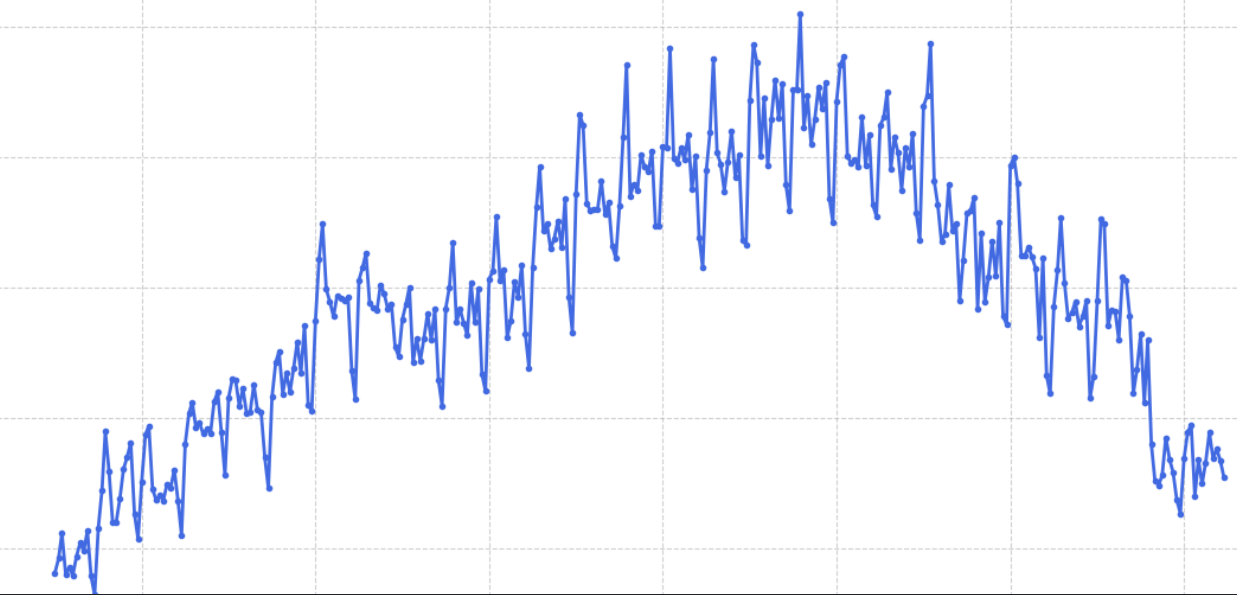

8. La série n'est pas stationnaire car la moyenne n'est pas constante et la variance de la série n'est pas constante (cf homoscédasticité).

9. On peut apercevoir une certaine saisonnalité dans la série, même si elle varie beaucoup.

10. La série présente elle une tendance ?

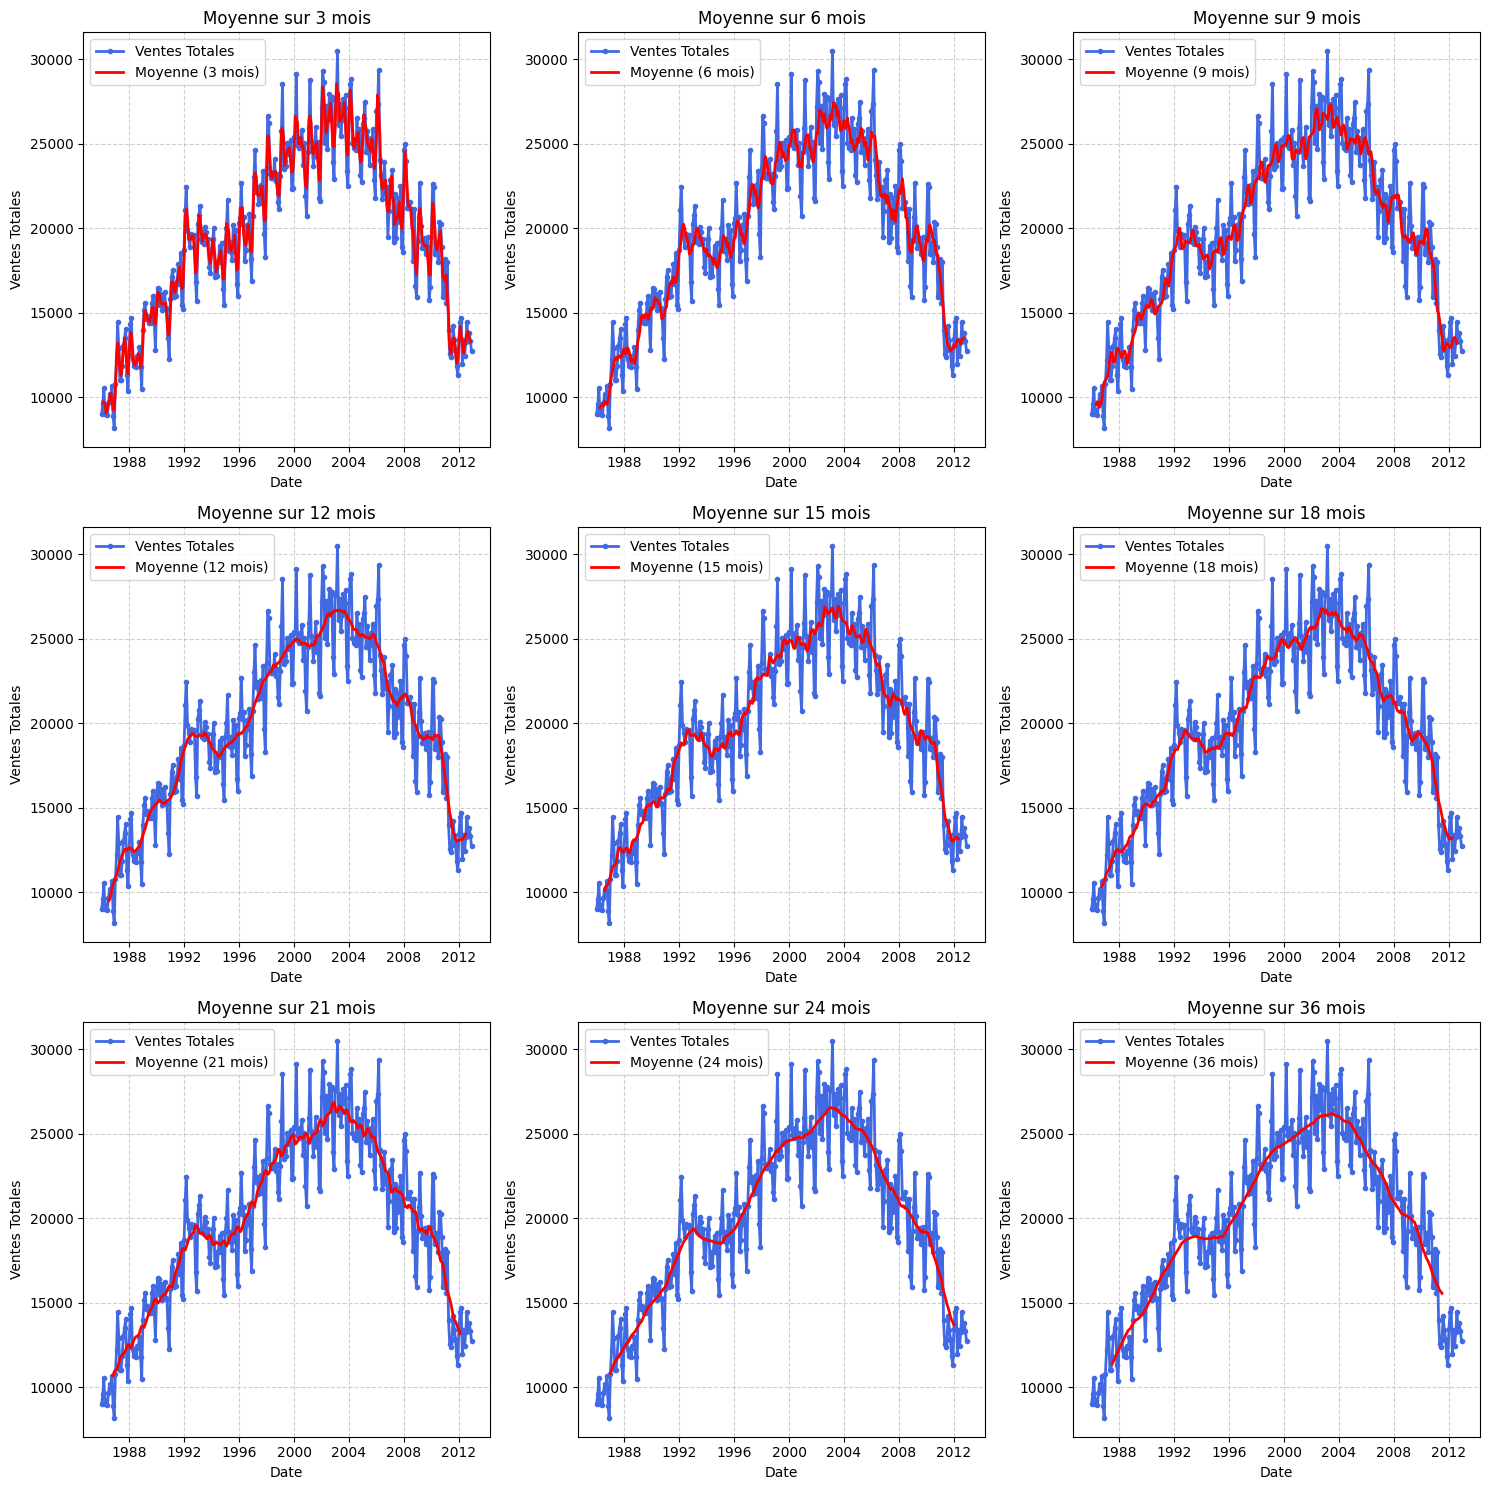

In [147]:
windows = [3, 6, 9, 12, 15, 18, 21, 24, 36]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for idx, window in enumerate(windows):
    data[f'Moyenne ({window} mois)'] = data['Total'].rolling(window=window, center=True).mean()
    
    ax = axes[idx // 3, idx % 3]
    
    ax.plot(data.index, data['Total'], color='royalblue', linewidth=2, marker='o', markersize=3, label='Ventes Totales')
    ax.plot(data.index, data[f'Moyenne ({window} mois)'], label=f'Moyenne ({window} mois)', linewidth=2, color='red')
    
    ax.set_title(f'Moyenne sur {window} mois', fontsize=12)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Ventes Totales', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

plt.tight_layout()

plt.show()


La série présente une tendance à la baisse depuis les années 2002 après avoir eu une tendance à la hausse dès 1988. (en fonction du graphique ci-dessus et pas du dataset)

11. Pouvez vous à partir des données de 1986 à 2000 établir un modèle prédictif sur les ventes de 2001 à 2012 ? Comparez le avec les ventes réelles et critiquez le.

p-value du test ADF : 0.4886635157188413
Les données ne sont pas stationnaires. On va continuer sans les différencier.


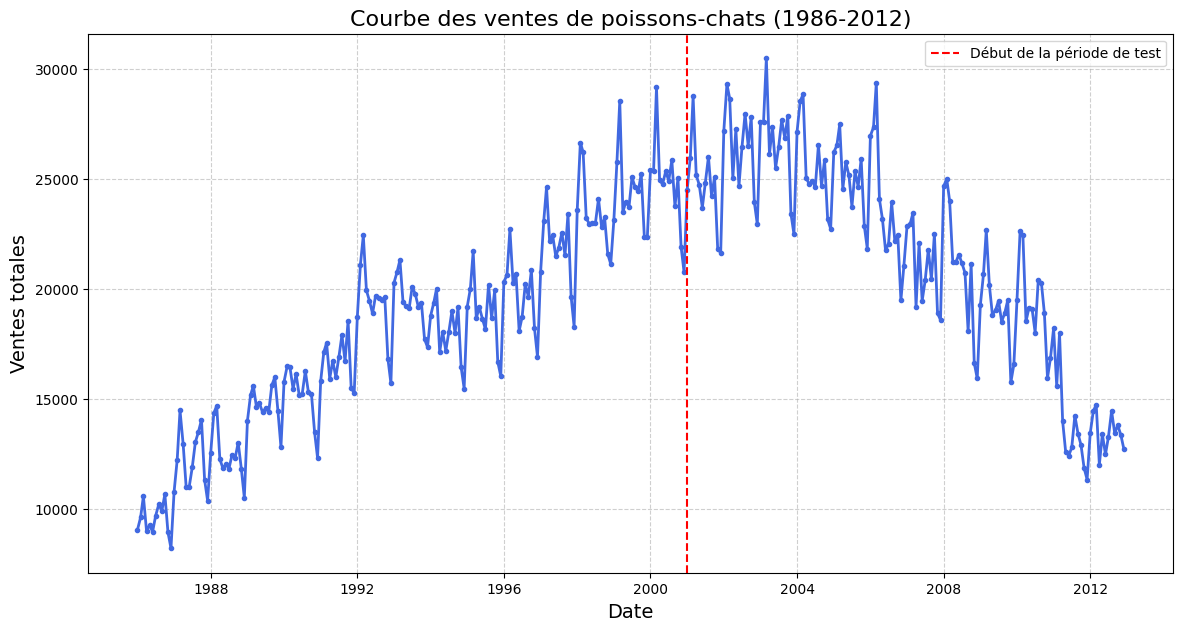

c:\Users\Ju\Desktop\La Manu\B2\dev\python\Maths\DM\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Ju\Desktop\La Manu\B2\dev\python\Maths\DM\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


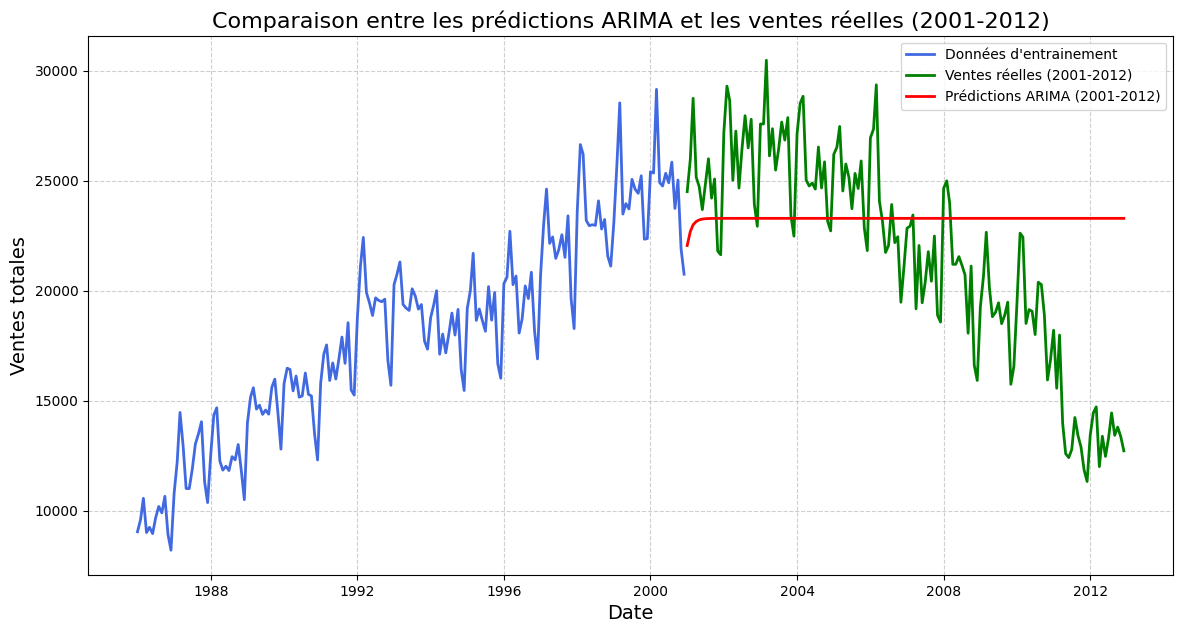

Erreur absolue moyenne (MAE): 4005.078410630446
Erreur quadratique moyenne (RMSE): 5060.330623293386


In [148]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('catfish.csv')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

data = data.asfreq('MS')

result = adfuller(data['Total'])
print(f"p-value du test ADF : {result[1]}")

if result[1] > 0.05:
    print("Les données ne sont pas stationnaires. On va continuer sans les différencier.")

train_data = data['1986-01-01':'2000-12-31']
test_data = data['2001-01-01':'2012-12-31']

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Total'], color='royalblue', linewidth=2, marker='o', markersize=3)
plt.axvline(x=pd.Timestamp('2001-01-01'), color='red', linestyle='--', label='Début de la période de test')
plt.title('Courbe des ventes de poissons-chats (1986-2012)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ventes totales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

model = ARIMA(train_data['Total'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test_data))

predicted = forecast
actual = test_data['Total'].values

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Total'], color='royalblue', linewidth=2, label='Données d\'entrainement')
plt.plot(test_data.index, actual, color='green', linewidth=2, label='Ventes réelles (2001-2012)')
plt.plot(test_data.index, predicted, color='red', linewidth=2, label='Prédictions ARIMA (2001-2012)')
plt.title('Comparaison entre les prédictions ARIMA et les ventes réelles (2001-2012)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ventes totales', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"Erreur absolue moyenne (MAE): {mae}")
print(f"Erreur quadratique moyenne (RMSE): {rmse}")


Je n'ai fais qu'une seule prédiction donc le résultat n'est pas terrible.

Il aurait fallu en faire plusieurs afin d'avoir une prédiction plus propre et peut-être plus réaliste.

Actuellement je trouve la prédiction très irréaliste surtout pour un produit aussi spécifique que le poisson, il y aura toujours des hausses et des baisses de vente en fonction des besoins, de la demande, de la saison etc...

En général (sauf exception), après une hausse des ventes ou d'un produit sur le marché, on observe souvent une légère baisse ou un temps mort avant une baisse plus importante.

12. Pour la question 12, je ne comprends pas trop pourquoi mais j'ai un problème de compatibilité entre numpy et pmdarima.
J'ai un peu cherché et c'est une erreur un peu chiante à resoudre, même en changeant d'env ou de version des librairies, rien n'a changé.
Je ne trouve pas ça très utile de laisser un code potentiellement faux, je passe cette question.

Exercice 6.2

1. Entre 10 et 25 cm ?

In [ ]:
from statistics import NormalDist

mu = 20
sigma = 5

dist = NormalDist(mu, sigma)

p_10_25 = dist.cdf(25) - dist.cdf(10)

print(f"P(10 ≤ X ≤ 25) ≈ {p_10_25:.3f}")

P(10 ≤ X ≤ 25) ≈ 0.819


2. Moins de 25 cm ?

In [151]:
p_less_25 = dist.cdf(25)
print(f"P(X ≤ 25) ≈ {p_less_25:.3f}")

P(X ≤ 25) ≈ 0.841


3. Plus de 30 cm ?

In [153]:
p_more_30 = 1 - dist.cdf(30)
print(f"P(X > 30) ≈ {p_more_30:.3f}")

P(X > 30) ≈ 0.023
